<a href="https://colab.research.google.com/github/zaaraquadrii/Zaara_Projects_Labs/blob/main/Module_02_Lab_01_Basic_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 1: Basic Plots
---


In this lab, you will learn simple ways to visualize your data using commonly-used libraries. Understanding the plots would further help in decoding the various features in the dataset and their impact on the target variables.

Data visualizations in Python can be done via many packages. We’ll be discussing first the *matplotlib* package which can be used in Python scripts, Jupyter notebook, and web application servers.

### **Matplotlib**

It is a 2-D plotting library that helps in visualizing figures. Matplotlib emulates Matlab like graphs and visualizations. Matlab is not free, is difficult to scale and as a programming language is tedious. So, matplotlib in Python is used as it is a robust, free and easy library for data visualization.

#### **Anatomy of a Matplotlib Figure**

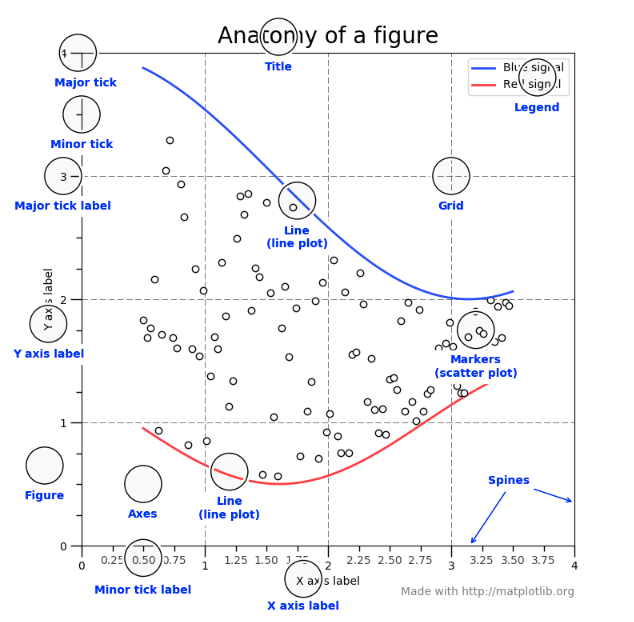

In [1]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

In [3]:
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

159


In [5]:
X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])

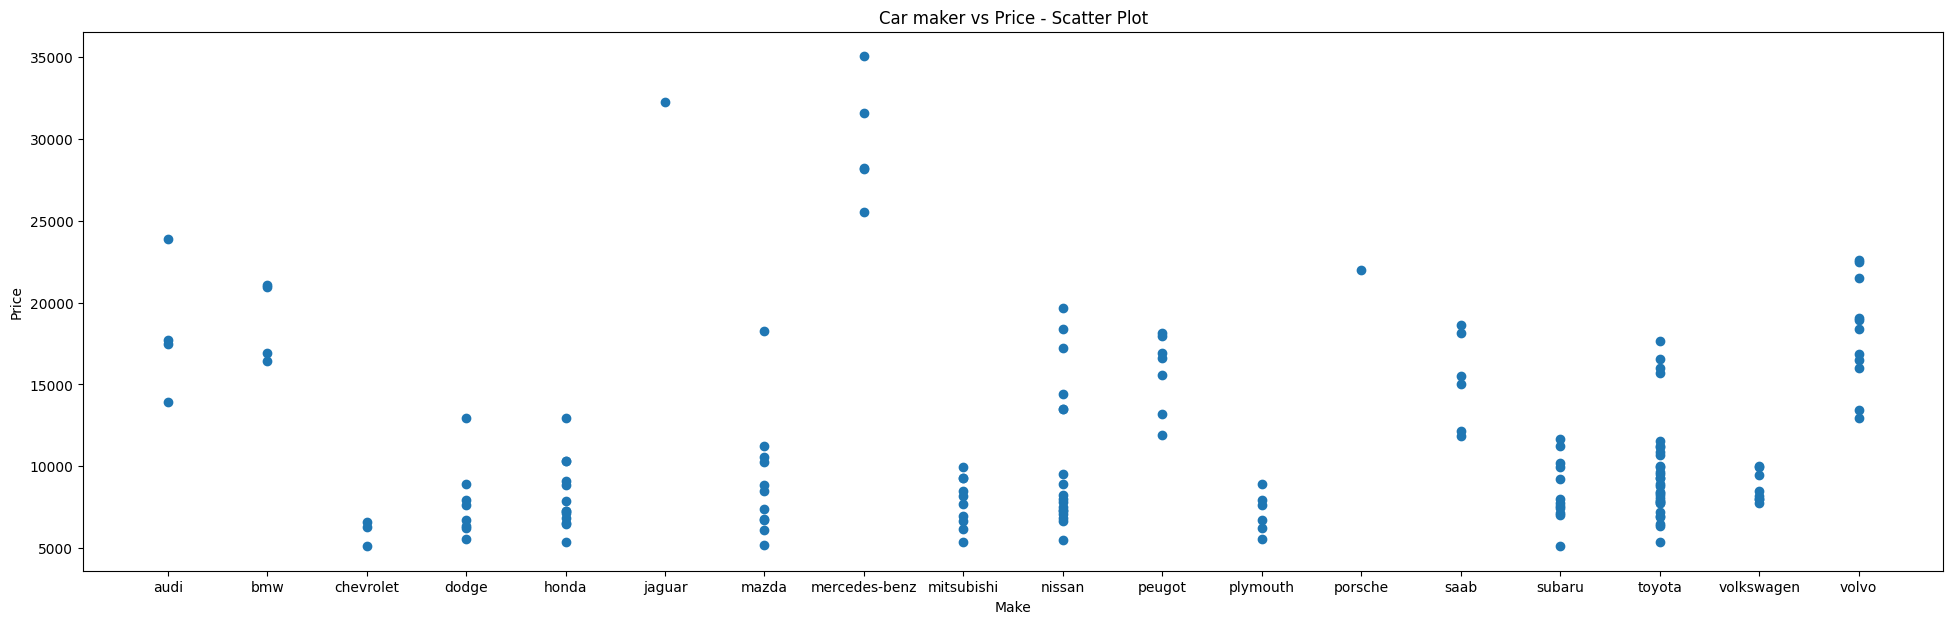

In [6]:
plt.figure(figsize = (24, 7))
plt.scatter(X["make"], y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

Even though the scatter plot clearly shows that some car makers like Mercedes-benz, Jaguar, Porsche and BMW keep their cars on the higher side of the price range. But is there a better way to understand the distribution of cars within these companies as well?

To do this, we will use the Seaborn package. Seaborn is a Python data visualization library based on matplotlib.

We will be creating a Box Plot. This is the type of plot that can be used to obtain more of the statistical details about the data. The straight lines at the maximum and minimum are also called as whiskers. Points outside of whiskers will be inferred as an outliers. The box plot gives us a representation of 25th, 50th ,75th quartiles. From a box plot we can also see the Interquartile range(IQR) where maximum details of the data will be present. It also gives us a clear overview of outlier points in the data.

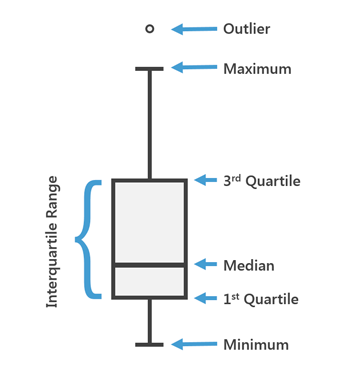

/tmp/ipython-input-7-892029043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')


Text(0.5, 1.0, 'Car Manufacturer vs Price - Box Plot')

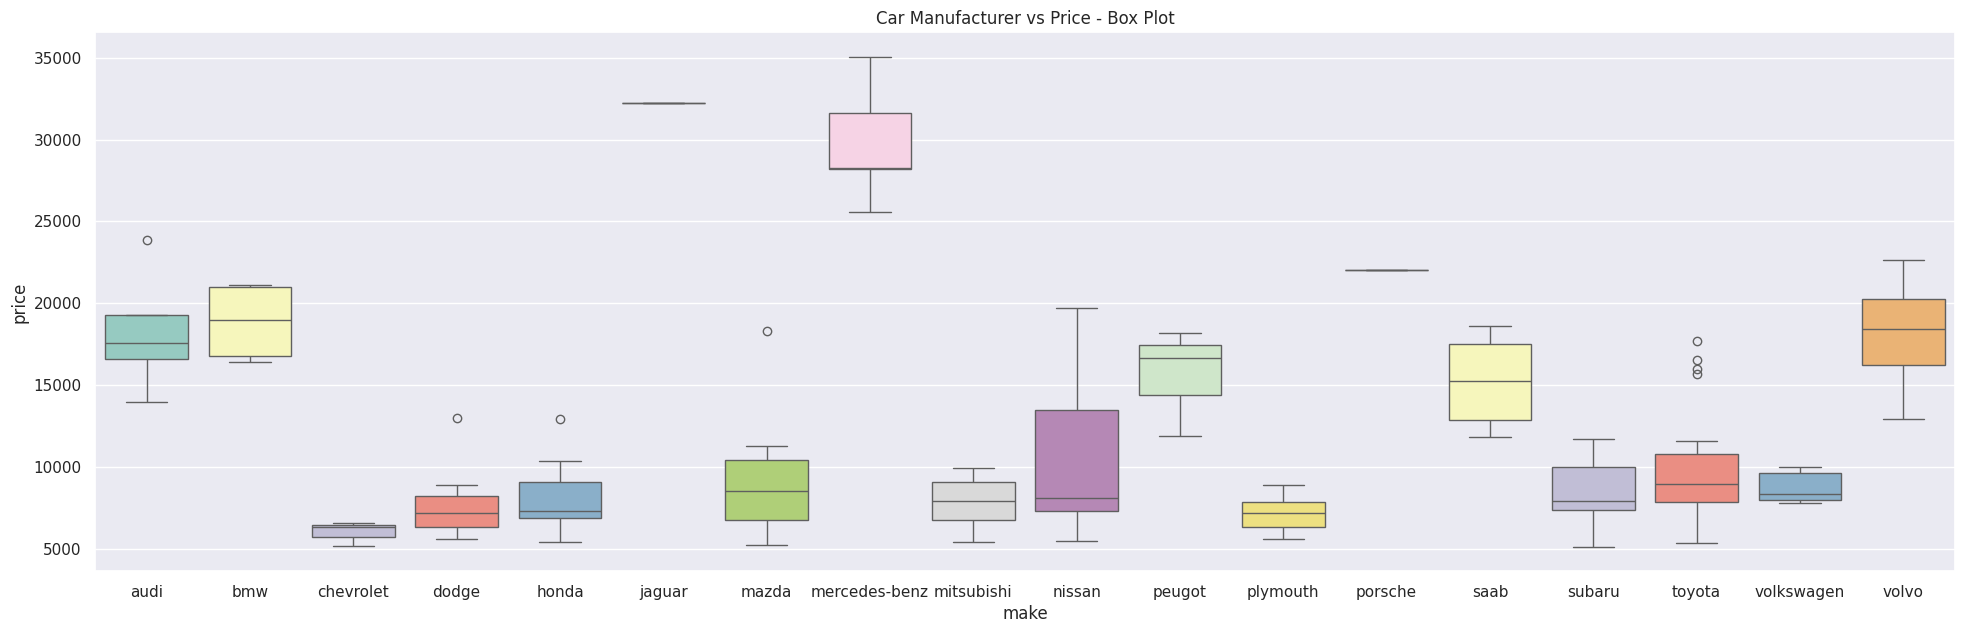

In [7]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')

/tmp/ipython-input-8-1765729027.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')


Text(0.5, 1.0, 'Body style vs Price Box Plot')

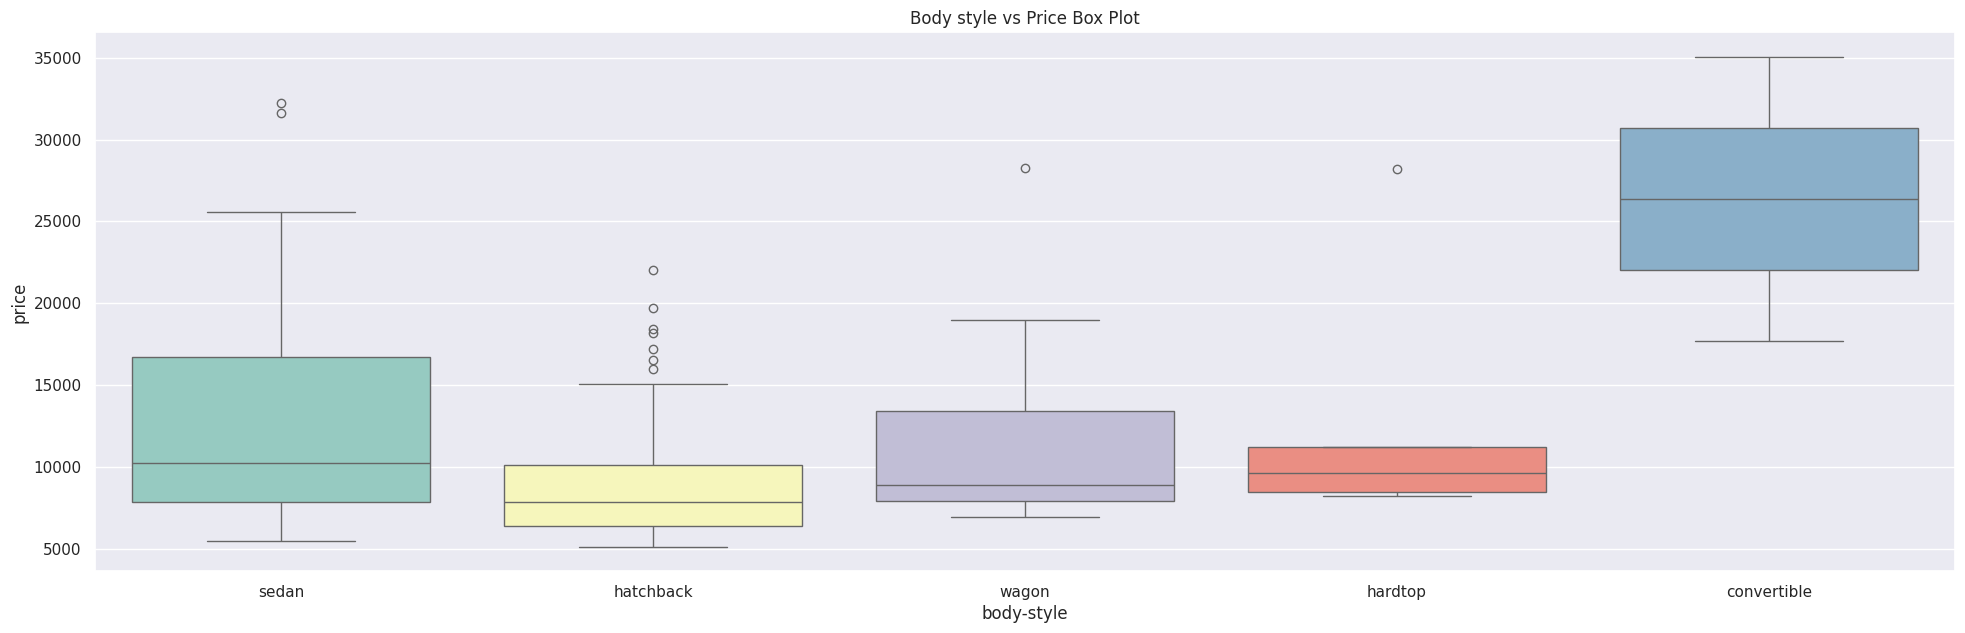

In [8]:
sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')

### Exercise
1. Plotting multiple plots together: Search for information about plt.subplots(). Choose any 2 plot types from the ones discussed above and plot them together in a single figure using subplots.
2. Go through the Seaborn documentation and find a plot type that has not been demonstrated in the examples above. Use this new plot type to represent the above data in a meaningful way.

/tmp/ipython-input-9-711269760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["body-style"], y=y, ax=axes[1], palette="Set3")


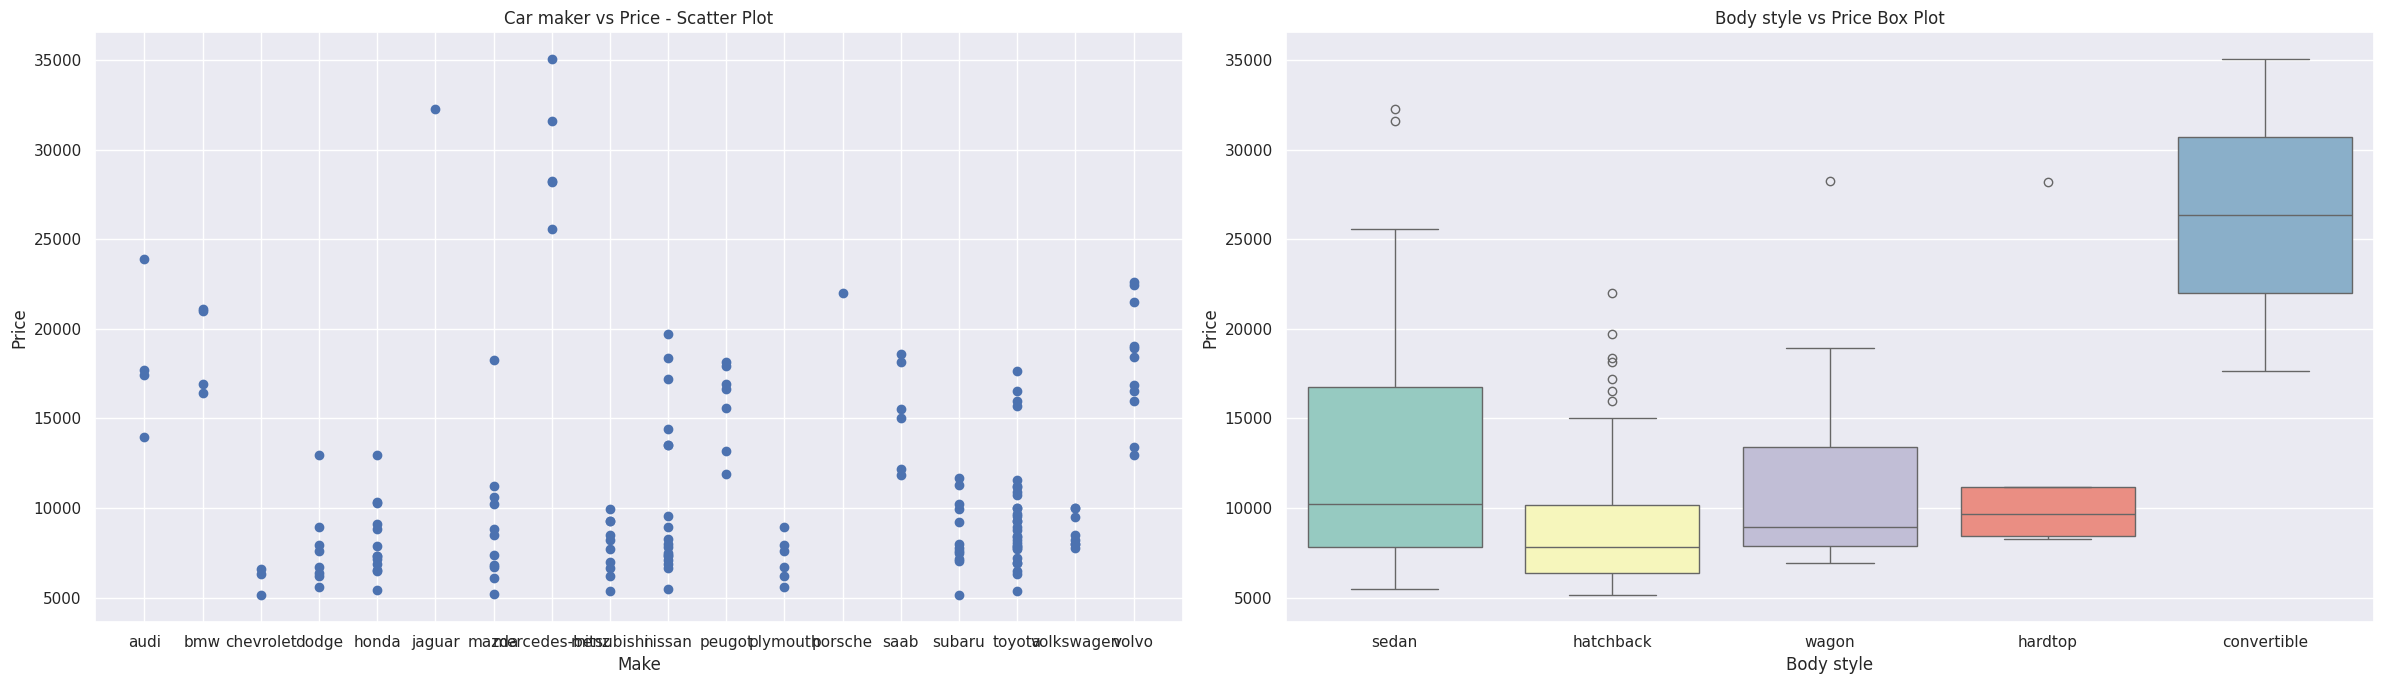

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 7))

axes[0].scatter(X["make"], y)
axes[0].set_xlabel('Make')
axes[0].set_ylabel('Price')
axes[0].set_title('Car maker vs Price - Scatter Plot')

sns.boxplot(x=X["body-style"], y=y, ax=axes[1], palette="Set3")
axes[1].set_xlabel('Body style')
axes[1].set_ylabel('Price')
axes[1].set_title('Body style vs Price Box Plot')

plt.tight_layout()
plt.show()

/tmp/ipython-input-10-1406677237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=X["body-style"], y=y, palette="Set3").set_title('Body style vs Price - Violin Plot')


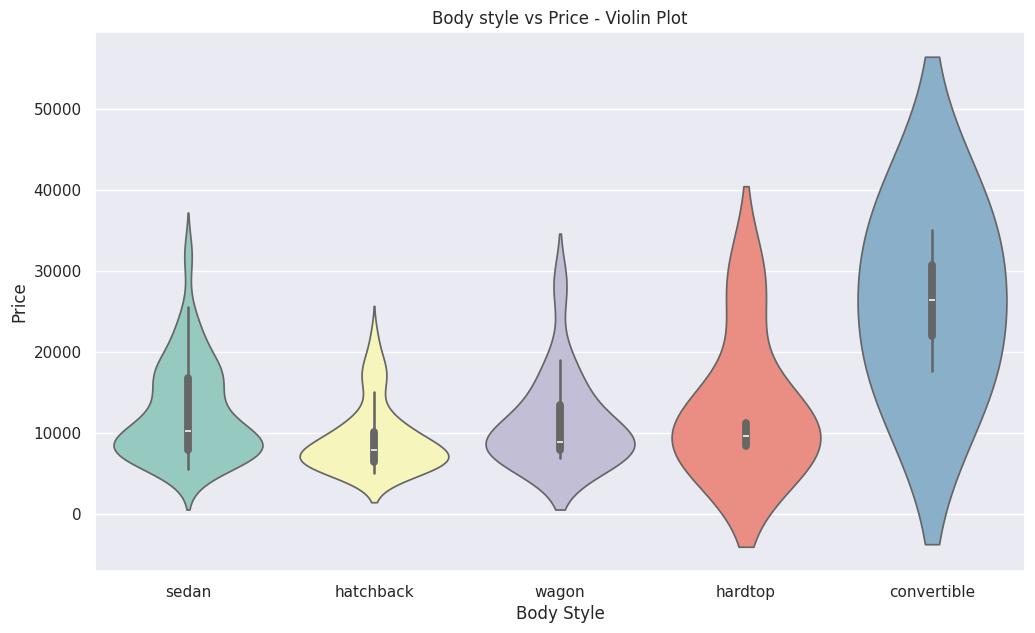

In [10]:
plt.figure(figsize=(12, 7))
sns.violinplot(x=X["body-style"], y=y, palette="Set3").set_title('Body style vs Price - Violin Plot')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.show()

/tmp/ipython-input-11-1406677237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=X["body-style"], y=y, palette="Set3").set_title('Body style vs Price - Violin Plot')


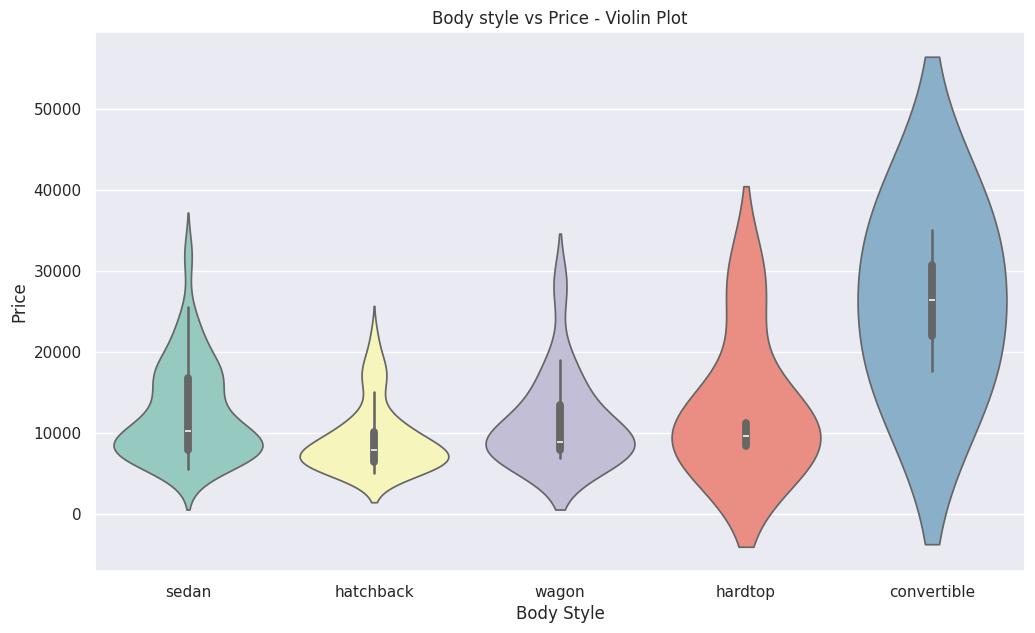

In [11]:
plt.figure(figsize=(12, 7))
sns.violinplot(x=X["body-style"], y=y, palette="Set3").set_title('Body style vs Price - Violin Plot')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.show()